# Time Series in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

<font color = "blue">
  
___Reading data___

In [2]:
df = pd.read_excel("C:/Users/sudheer_n1/Desktop/Sudheer/rwd/Time series for STat Take Home test.xlsx");df.head()

,week,Rev from a Sport Store retail
0,15-W01,9.956822e+05
1,15-W02,1.175470e+06
2,15-W03,1.406700e+06
3,15-W04,1.042557e+06
4,15-W05,1.268013e+06


<font color = "blue">
  
___For simplicity, I will rename "Rev from a Sport Store retail" column as "revenue"___

In [3]:
df.rename(columns = {"Rev from a Sport Store retail":"revenue"}, inplace = True)

In [4]:
df.shape

(281, 2)

In [5]:
df.describe()

,revenue
count,2.710000e+02
mean,1.453114e+06
std,4.356253e+05
min,3.341297e+05
25%,1.152959e+06
50%,1.388989e+06
75%,1.688565e+06
max,3.226365e+06


In [6]:
df.describe()

,revenue
count,2.710000e+02
mean,1.453114e+06
std,4.356253e+05
min,3.341297e+05
25%,1.152959e+06
50%,1.388989e+06
75%,1.688565e+06
max,3.226365e+06


<font color = "blue">
  
___Given data has 281 rows and 2 columns___

In [7]:
df.isna().sum()

week        0
revenue    10
dtype: int64

In [8]:
df[df.iloc[:,1].isna()==True]

,week,revenue
271,test_-W11,NaN
272,test_-W12,NaN
273,test_-W13,NaN
274,test_-W14,NaN
275,test_-W15,NaN
276,test_-W16,NaN
277,test_-W17,NaN
278,test_-W18,NaN
279,test_-W19,NaN
280,test_-W20,NaN


<font color = "blue">
  
___Last 10 rows are meant for testing and (281-10=) 271 rows are for training___

<font color = "blue">
    
___Week number 20 for 2018 has an error. It is manually converted___

In [9]:
df.at[176, 'week'] = '18-W20'

<font color = "brown">
    
### ___Create training and testing sets___

In [22]:
train = df[df.revenue.isna()==False]
test = df[df.revenue.isna()==True]

In [23]:
test.shape

(10, 2)

In [24]:
train.shape

(271, 2)

In [25]:
train.isna().sum().sum()

0

<font color = "blue">
  
___There is no missing values in train data___

In [26]:
train.describe()

,revenue
count,2.710000e+02
mean,1.453114e+06
std,4.356253e+05
min,3.341297e+05
25%,1.152959e+06
50%,1.388989e+06
75%,1.688565e+06
max,3.226365e+06


***
<font color = "brown">
    
### Understanding data trend

IndexError: single positional indexer is out-of-bounds

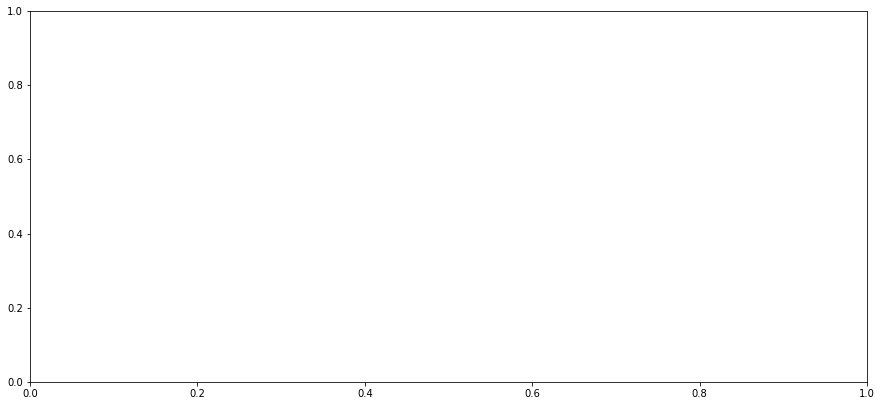

In [50]:
plt.subplots(figsize=(15,15))
plt.subplot(211)
plt.plot(train.iloc[:,0], train.iloc[:,1], color = "brown")

plt.subplots(figsize=(15,15))
plt.subplot(212)
train.iloc[:,1].plot(linewidth=0.5);

<font color = "blue">
  
___From mere visual inspection, it is evident that the series is not stationary and has seasonality___

In [28]:
# Use the height and width to calculate the area
def convert(x):
    return datetime.datetime.strptime(x + '-1', "%y-W%W-%w")

In [29]:
train.index = train["week"].apply(lambda x: convert(x))

In [30]:
train = train.drop(["week"],axis=1)

In [31]:
train.sample(5)

,revenue
week,
2016-12-26,1.678454e+06
2020-01-06,1.122936e+06
2015-05-11,2.175379e+06
2018-08-27,1.253001e+06
2018-03-05,1.217779e+06


***
<font color = "brown">
    
### ___Fixing TEST set___

In [32]:
test["week"] =  test["week"].str.replace("test_", "20")
test.index = test["week"].apply(lambda x: convert(x))
test = test.drop(["week"],axis=1)
test.sample(5)

C:\Users\sudheer_n1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,revenue
week,
2020-05-11,NaN
2020-04-13,NaN
2020-04-06,NaN
2020-03-23,NaN
2020-05-04,NaN


***
<font color = "brown">
    
### ___Now, my train and test set are in order, I go with analysis___

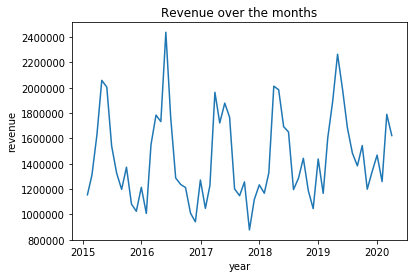

In [41]:
plt.title("Revenue over the months")
plt.plot(train.resample(rule = "m").mean())
plt.xlabel("year")
plt.ylabel("revenue")
plt.show()

<font color = "blue">
  
___The revenue is not same on all months, there is seasonality___

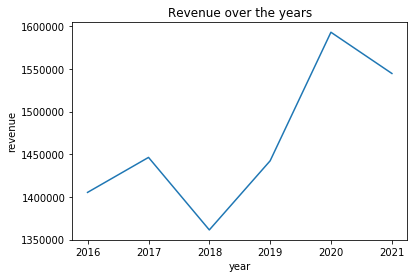

In [40]:
plt.title("Revenue over the years")
plt.plot(train.resample(rule = "y").mean())
plt.xlabel("year")
plt.ylabel("revenue")
plt.show()

<font color = "blue">
  
___There is an upward trend in revenue___

***
<font color = "brown">
    
### ___Visual Inspection for Stationarity___

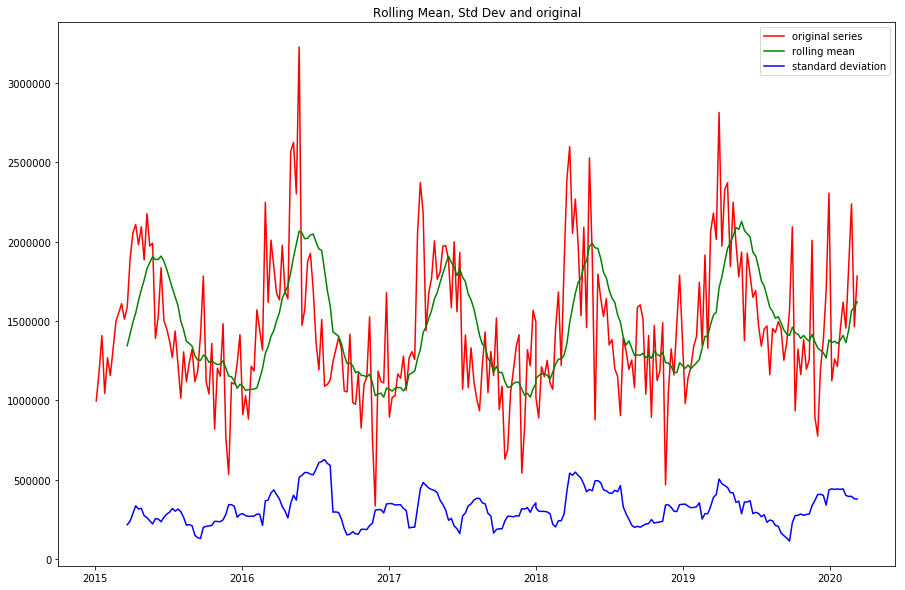

In [53]:
plt.subplots(figsize=(15,10))
plt.title("Rolling Mean, Std Dev and original")
plt.plot(train, color= 'r', label = "original series")
plt.plot(train.rolling(window= 12).mean() , color = "g", label = "rolling mean")
plt.plot(train.rolling(window=12).std(), color = 'b', label = "standard deviation")
plt.legend()
plt.show()

***
<font color = "brown">
    
### ___Tests of Stationarity via ADCF or augmented Dickey Fuller test___

In [69]:
from statsmodels.tsa.stattools import adfuller

fuller = adfuller(train["revenue"], autolag="AIC")

result = pd.Series(fuller[0:4], index = ['test statistic','p-value','#Lag value','Nof of Obs'])

In [70]:
for key, value in fuller[4].items():
    result["Critical Value (%s)"%key] = value

In [72]:
fuller[0]

-4.368407137685953

In [73]:
fuller[4]

{'1%': -3.4556556713934934, '5%': -2.872678352489859, '10%': -2.57270548832225}

In [71]:
print(result)

test statistic           -4.368407
p-value                   0.000337
#Lag value                9.000000
Nof of Obs              261.000000
Critical Value (1%)      -3.455656
Critical Value (5%)      -2.872678
Critical Value (10%)     -2.572705
dtype: float64


<font color = "blue">
  
___no or zero lag series has a ACDF value -4.37 which is less than the critical value for 1%. With 99% confidence, we can say that the series is stationary___

***
<font color = "brown">
    
### ___Log transformation___

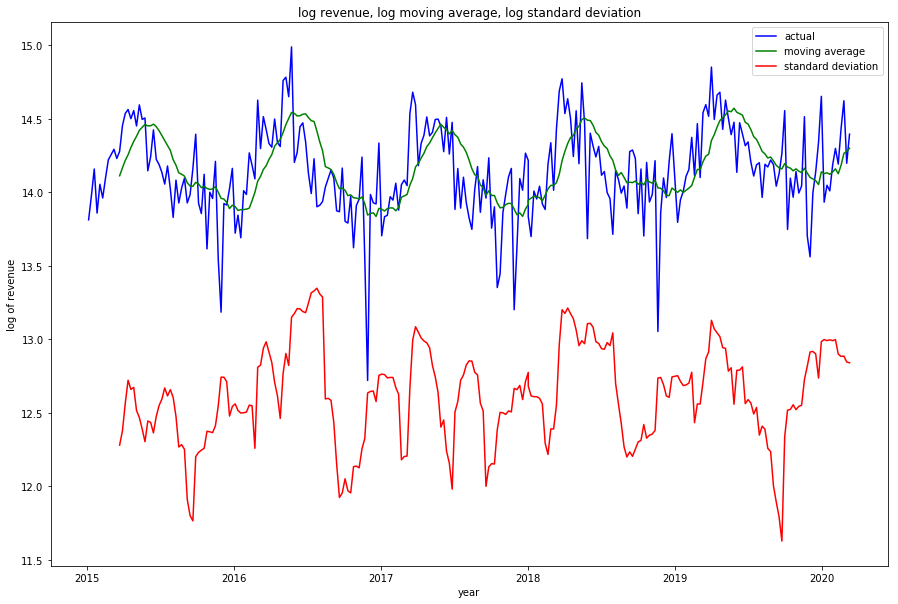

In [91]:
import numpy as np
plt.subplots(figsize=(15,10))
plt.xlabel("year")
plt.ylabel("log of revenue")
plt.title("log revenue, log moving average, log standard deviation")
plt.plot(np.log(train.revenue), color = "b", label = "actual")
plt.plot(np.log(train.rolling(window = 12).mean()), color = "g", label = "moving average")
plt.plot(np.log(train.rolling(window = 12).std()), color = "r", label = "standard deviation")
plt.legend()
plt.show()

<font color = "blue">
  
___difference between revenue moving avg vs actual revenue___

,DEAL_SIZE
0,10.0
1,20.0
2,NaN
3,20.0


```python
def function(x):
    x['DEAL_SIZE'] = np.where(x['DEAL_SIZE'].isnull() ==True, 1, x["DEAL_SIZE"].sum() )
    return x
tmp = x[ (x.SNPSH_DT == x.CLSD_DT) & (x.SNPSH_DT !=0) & (x.SNPSH_DT < x.TT+1)   ].apply(lambda x: function(x))
```

# OR

```python
def function(x):
    x['DEAL_SIZE'] = np.where(x['DEAL_SIZE'].isnull() ==True, 1, x["DEAL_SIZE"].sum() )
    return x
tmp = x[ (x.SNPSH_DT == x.CLSD_DT) & (x.SNPSH_DT !=0) & (x.SNPSH_DT < x.TT+1)   ].apply(lambda x: function(x))
```